In [2]:
### IMPORTS ###

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import json
from pprint import pprint
import matplotlib.image as mpimg
import matplotlib.patches as patches
from PIL import Image
from io import BytesIO
#from highlight_text import htext
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from mplsoccer.pitch import Pitch, VerticalPitch
import matplotlib.patheffects as path_effects

from matplotlib import font_manager
#font_manager.findSystemFonts(fontpaths=None, fontext="ttf")
plt.rcParams["font.family"] = "Rubik"

In [6]:
### PITCH DRAWING FUNC, Credit to @Sonofacorner

def soc_pitch_divisions(ax, grids = False):
    '''
    This function returns a vertical football pitch
    divided in specific locations.

    Args:
        ax (obj): a matplotlib axes.
        grids (bool): should we draw the grid lines?
    '''

    # Notice the extra parameters passed to the object
    pitch = VerticalPitch(
        pitch_type = "uefa",
        half = True,
        goal_type='box',
        linewidth = 2,
        line_color='black',
        pitch_color='white'
#        corner_arcs = True
    )

    pitch.draw(ax = ax)

    # Where we'll draw the lines
    if grids:
        y_lines = [105 - 5.5*x for x in range(1,10)]
        x_lines = [68 - 6.8*x for x in range(1,10)]

        for i in x_lines:
            ax.plot(
                [i, i], [45, 105], 
                color = "darkgrey", 
                ls = "--",
                lw = 2,
                zorder = -1
            )
        for j in y_lines:
            ax.plot(
                [68, 0], [j, j],
                color = "darkgray", 
                ls = "--",
                lw = 2,
                zorder = -1
            )

    return ax

In [7]:
### Load in Data, Xi/Yi is the coords scaled to UEFA pitch dims and invertyed for use on a vertical pitch plot

data_dir = 'data/JWP_FK.csv'

df_fk = pd.read_csv('data/JWP_FK.csv', index_col = 0).reset_index()

df_fk

,index,X,Y,result,xG,situation,shotType,h_team,a_team,h_a,Xi,Yi
0,3,0.741,0.747,ShotOnPost,0.034644,DirectFreekick,RightFoot,Southampton,West Bromwich Albion,h,50.795998,77.804998
1,8,0.734,0.364,MissedShots,0.045185,DirectFreekick,RightFoot,Burnley,Southampton,a,24.752001,77.070002
2,17,0.806,0.396,MissedShots,0.112513,DirectFreekick,RightFoot,Queens Park Rangers,Southampton,a,26.927999,84.629998
3,22,0.775,0.445,MissedShots,0.085287,DirectFreekick,RightFoot,Everton,Southampton,a,30.260000,81.375000
4,30,0.735,0.526,SavedShot,0.054307,DirectFreekick,RightFoot,Southampton,Norwich,h,35.767999,77.175000
...,...,...,...,...,...,...,...,...,...,...,...,...
111,347,0.767,0.403,ShotOnPost,0.070560,DirectFreekick,RightFoot,Manchester United,Southampton,a,27.403999,80.534997
112,349,0.778,0.277,MissedShots,0.050211,DirectFreekick,RightFoot,Southampton,Brentford,h,18.836001,81.690003
113,352,0.711,0.557,MissedShots,0.041177,DirectFreekick,RightFoot,Southampton,Tottenham,h,37.876001,74.654998
114,357,0.841,0.859,BlockedShot,0.038459,DirectFreekick,RightFoot,Brighton,Southampton,a,58.412001,88.304998


NameError: name 'fk_OnTarget' is not defined

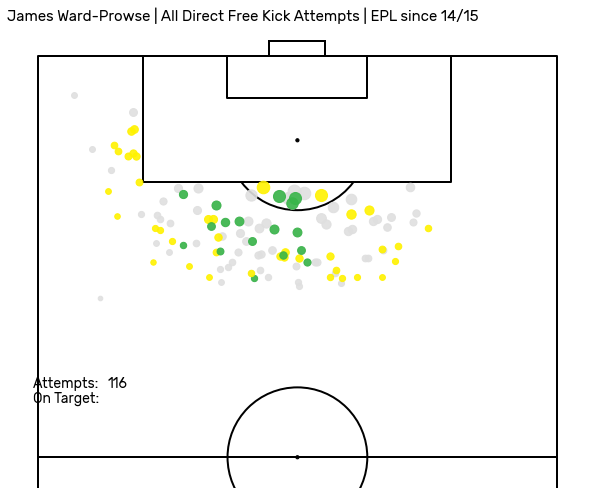

In [8]:
### Plot 1, Attempt Scatter Plot
### Yi coords scaled by 1.02 to better line up with the true location.

fig, ax = plt.subplots(figsize=(13,8.5))


#plt.ylim(5,80)
#plt.xlim(0,120)

soc_pitch_divisions(ax, grids = False)



ax.set_title('James Ward-Prowse | All Direct Free Kick Attempts | EPL since 14/15',fontsize=15, loc='left')

for x in range(len(df_fk)):
        if df_fk['result'][x] == 'Goal': 
            plt.scatter(df_fk['Xi'][x],df_fk['Yi'][x]*1.02, color = '#39b54a',s=df_fk['xG'][x]*1000,zorder=2,alpha=.9,label="Goal")
        if df_fk['result'][x] == 'SavedShot':
            plt.scatter(df_fk['Xi'][x],df_fk['Yi'][x]*1.02, color = '#fff200',s=df_fk['xG'][x]*1000,zorder=2,alpha=.9,label="Saved")
        else:
            plt.scatter(df_fk['Xi'][x],df_fk['Yi'][x]*1.02, color = '#DFDFDF',s=df_fk['xG'][x]*1000,zorder=1,alpha=.9, label="Off Target")


              
fig.text(0.23,0.29,"Attempts: ",fontsize=14)
fig.text(0.31,0.29,str(len(df_fk)),fontsize=14)
fig.text(0.23,0.265,"On Target: ",fontsize=14)
fig.text(0.31,0.265,str(fk_OnTarget),fontsize=14)
fig.text(0.23,0.24,"Goals: ",fontsize=14)
fig.text(0.31,0.24,str(fk_goals),fontsize=14)
fig.text(0.23,0.215,"xG:",fontsize=14)
fig.text(0.31,0.215,str(xG_tot),fontsize=14)
fig.text(0.23,0.19,"Diff:",fontsize=14)
fig.text(0.31,0.19,str(fk_goals-xG_tot)+'+',fontsize=14, color='green')




/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


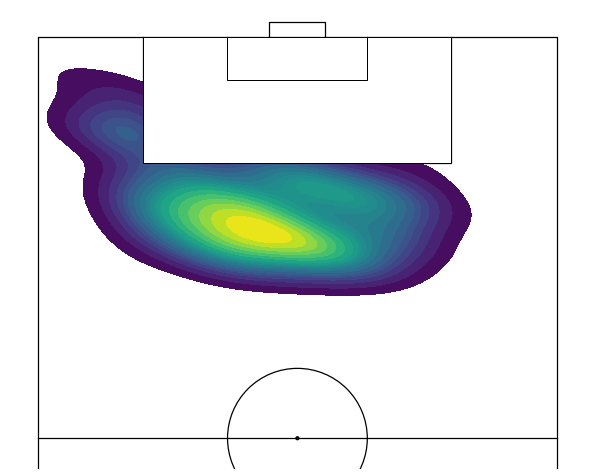

In [5]:
fig, ax = plt.subplots(figsize=(13,8.5))

soc_pitch_divisions(ax, grids = False)

kde = sns.kdeplot(
    df_fk['Xi'],
    df_fk['Yi']*1.02,
    fill=True,
    shade_lowest=False,
    alpha=1,
    n_levels=20,
    cmap='viridis'
)


## Opaque box for freelkick heatmap
box_18 = patches.Rectangle((13.84, 105-16.5), 40.35, 16.5, linewidth=1, edgecolor='k', facecolor='w')
box_6 = patches.Rectangle((24.9, 99.4), 18.3, 5.7, linewidth=1, edgecolor='k', facecolor='w')
ax.add_patch(box_18)
ax.add_patch(box_6)





In [6]:
df_fk_goals = df_fk.loc[df_fk['result']=='Goal']

df_fk_goals['bin_count']=1

total_goals = len(df_fk_goals)

<ipython-input-6-f446912870ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fk_goals['bin_count']=1


In [7]:
y_bins = [105] + [105 - 5.5*x for x in range(1,10)] + [45]
x_bins = [68] + [68 - 6.8*x for x in range(1,10)] + [0]

x_bins.sort()
y_bins.sort()

In [8]:
df_fk_goals["bins_x"] = pd.cut(df_fk_goals["Xi"], bins = x_bins)

df_fk_goals["bins_y"] = pd.cut(df_fk_goals["Yi"], bins = y_bins)

#Group and sum xGOT by side and location
df_fk_goals = (
    df_fk_goals.groupby(
        ["bins_x", "bins_y"], 
        observed = True
    )['bin_count'].sum().reset_index()
)


df_fk_goals = (
    df_fk_goals
    .assign(attempts_share = lambda x: x.bin_count/total_goals)
)

df_fk_goals

<ipython-input-8-923ebf1608e2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fk_goals["bins_x"] = pd.cut(df_fk_goals["Xi"], bins = x_bins)
<ipython-input-8-923ebf1608e2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fk_goals["bins_y"] = pd.cut(df_fk_goals["Yi"], bins = y_bins)


,bins_x,bins_y,bin_count,attempts_share
0,"(27.2, 34.0]","(72.0, 77.5]",1,0.058824
1,"(27.2, 34.0]","(77.5, 83.0]",1,0.058824
2,"(34.0, 40.8]","(72.0, 77.5]",2,0.117647
3,"(34.0, 40.8]","(77.5, 83.0]",3,0.176471
4,"(34.0, 40.8]","(83.0, 88.5]",3,0.176471
5,"(40.8, 47.6]","(77.5, 83.0]",4,0.235294
6,"(40.8, 47.6]","(83.0, 88.5]",1,0.058824
7,"(47.6, 54.4]","(77.5, 83.0]",1,0.058824
8,"(47.6, 54.4]","(83.0, 88.5]",1,0.058824


Text(0.5, 1.0, 'James Ward-Prowse | All Free Kick Goals | EPL since 14/15')

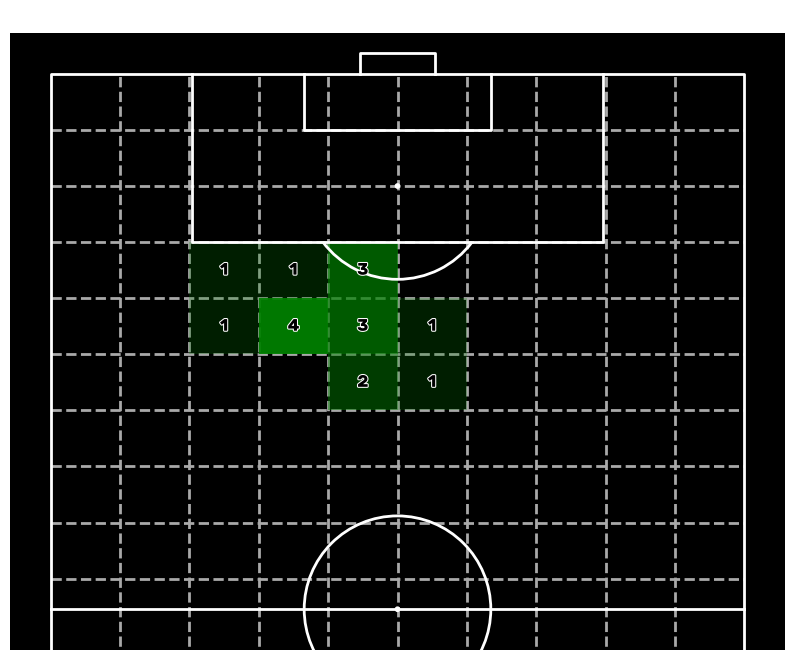

In [34]:
plt.rcParams["font.family"] = "Rubik"

fig = plt.figure(figsize = (10,10), dpi = 100)
ax = plt.subplot(111)

soc_pitch_divisions(ax, grids = True)

counter = 0
for X, Y in zip(df_fk_goals["bins_x"], df_fk_goals["bins_y"]):
	#This colours our bins
    ax.fill_between(
        x = [X.left, X.right],
        y1 = Y.left,
        y2 = Y.right,
        color = "green",
        zorder = 0,
        lw = 0,
        alpha = df_fk_goals['attempts_share'].iloc[counter]*4
 
    )
    if df_fk_goals['attempts_share'].iloc[counter] > 0:
        text_ = ax.annotate(
            xy = (X.right - (X.right - X.left)/2, Y.right - (Y.right - Y.left)/2),
            text = f"{df_fk_goals['bin_count'].iloc[counter]}",
            ha = "center",
            va = "center",
            color = "black",
            size = 12,
            weight = "bold",
            zorder = 3
        )
        text_.set_path_effects(
            [path_effects.Stroke(linewidth=1.5, foreground="white"), path_effects.Normal()]
        )
	
    
    counter += 1
    
ax.set_title('James Ward-Prowse | All Free Kick Goals | EPL since 14/15',fontsize=12,color='white')

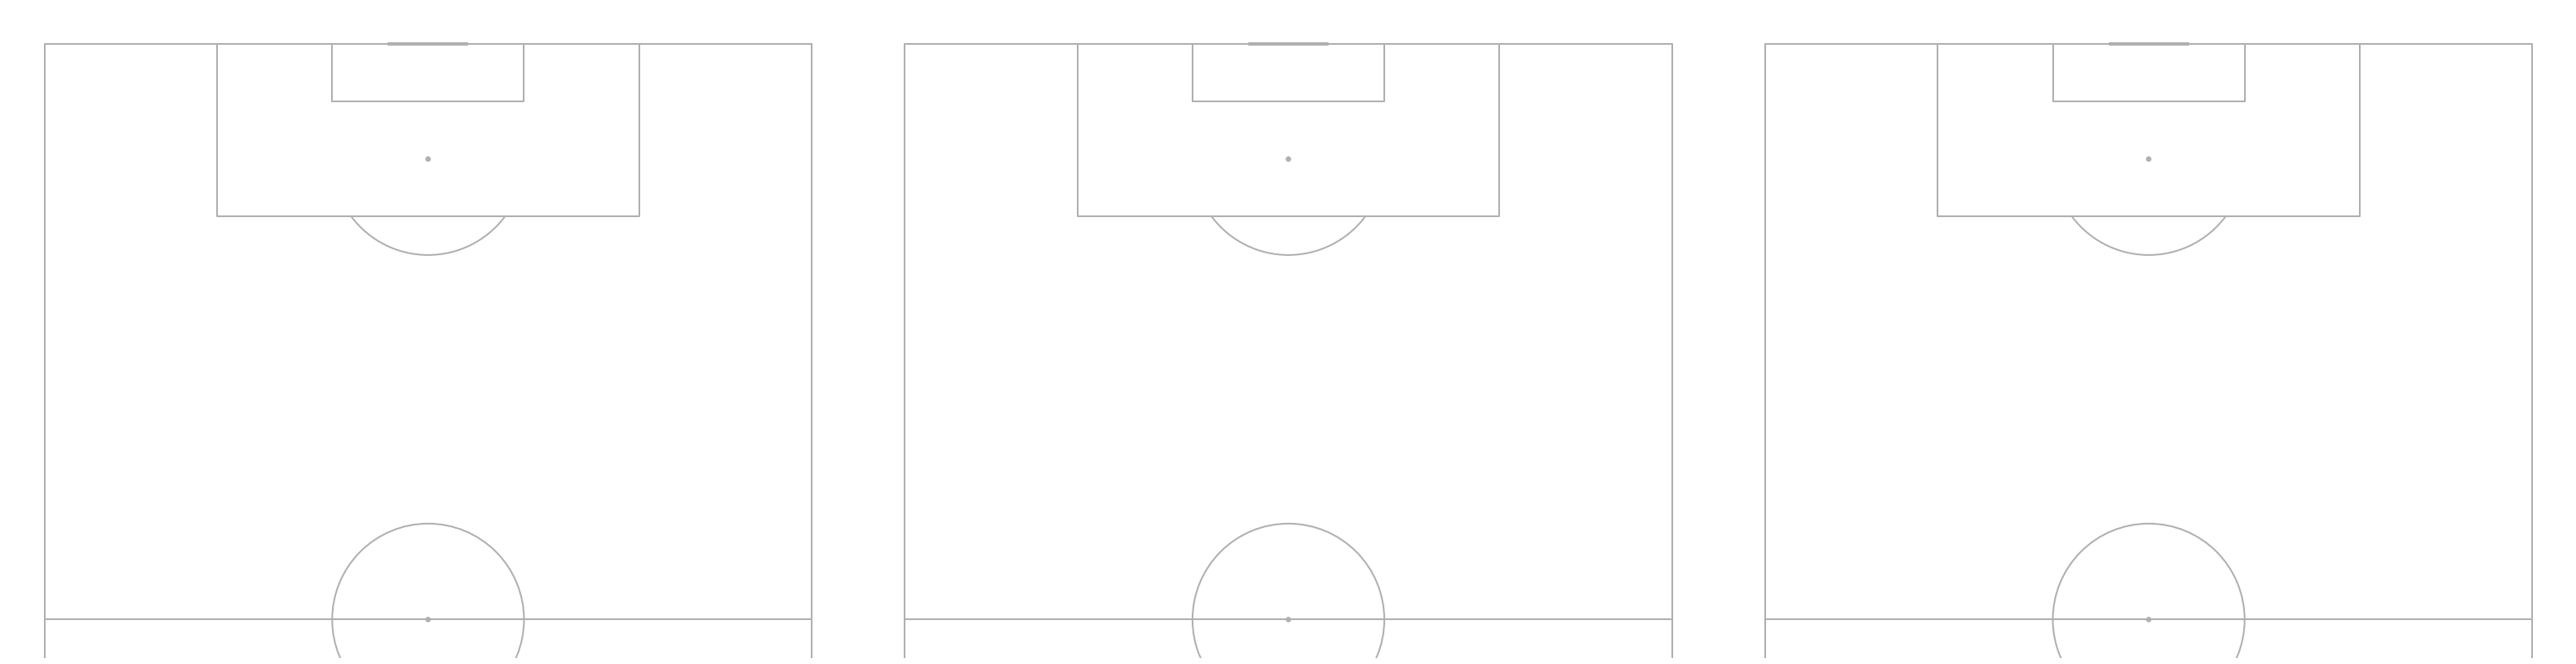

In [32]:
pitch = VerticalPitch(half=True)

fig, axs = pitch.grid(figheight=15, ncols=3,endnote_height=0, title_height=0)